# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tarikthomas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin', language="en",sort_by="relevancy")
#bitcoins_headlines

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='ethereum', language="en",sort_by="relevancy")


In [6]:
bitcoin_headlines['articles'][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [7]:
def sentiment_scores_transformer(headlines):
    sentiments = []
    for article in headlines["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    headlines_df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    headlines_df = headlines_df[cols]
    return headlines_df

In [8]:
bitcoin_df = sentiment_scores_transformer(bitcoin_headlines)
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.093390,0.059450,0.08045,0.860050
std,0.389782,0.062439,0.07613,0.104336
min,-0.859300,0.000000,0.00000,0.557000
25%,-0.366350,0.000000,0.05350,0.827000
50%,-0.190100,0.048000,0.06300,0.888000
75%,0.152575,0.085000,0.08425,0.930250
max,0.750600,0.202000,0.30000,0.964000


In [9]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df = sentiment_scores_transformer(bitcoin_headlines)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10T16:59:46Z,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04T12:00:00Z,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02T11:30:00Z,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16T20:45:00Z,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09T03:04:37Z,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [10]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = sentiment_scores_transformer(ethereum_headlines)
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10T13:10:20Z,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02T15:54:35Z,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04T02:32:00Z,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26T05:15:00Z,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26T20:45:44Z,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [11]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.093390,0.059450,0.08045,0.860050
std,0.389782,0.062439,0.07613,0.104336
min,-0.859300,0.000000,0.00000,0.557000
25%,-0.366350,0.000000,0.05350,0.827000
50%,-0.190100,0.048000,0.06300,0.888000
75%,0.152575,0.085000,0.08425,0.930250
max,0.750600,0.202000,0.30000,0.964000


In [12]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.029180,0.045900,0.049450,0.904800
std,0.402413,0.059923,0.043592,0.052498
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.858750
50%,-0.189700,0.000000,0.059000,0.925500
75%,0.288700,0.073000,0.069000,0.937000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: bitcoin

Q: Which coin had the highest compound score?

A: bitcoin

Q. Which coin had the highest positive score?

A: bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
print(sw)

{'up', 'and', 'ourselves', 'all', 'hasn', 'between', 'yourself', 'whom', "should've", 'needn', 'a', 'on', 'no', 'just', 'this', 'is', 'isn', 'if', 'you', "haven't", 'once', 'which', 'yourselves', 'my', 'yours', 'he', 'ain', 'from', 'doing', 'only', 'am', 'couldn', 'weren', "didn't", 'down', "that'll", 'before', 'now', 'was', "she's", 'themselves', 'd', "you'd", 'did', 'then', "won't", 'have', 'while', 'herself', 'into', "mustn't", 'over', 'don', 'because', 'about', 'will', 'being', 'too', 'do', 'her', 'she', 'nor', 'here', 'of', 'their', 'been', 'there', 'can', 'your', 'how', 's', 'the', 'didn', 'mustn', "shan't", 'has', 'are', 'why', 'shouldn', 'll', 'y', 'those', 'when', 'should', 'its', 'me', 'itself', 'we', 'by', "needn't", 'both', 'doesn', 'out', 'some', 'so', "don't", 'his', 'most', 'again', 'but', 'myself', 'hers', 'an', "it's", 'off', 'such', 'in', 'other', 'more', 'that', 'be', 'against', 'where', 'having', 'as', 'until', 'i', 'or', 'for', 'very', 'mightn', 'him', "you're", 't

In [35]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
#     # Remove the punctuation from text
#     regex = re.compile("[^a-zA-Z ]")
#     re_clean = regex.sub('', article)
    
    
#     output = [word.lower() for word in lem if word.lower() not in sw]

   
#     # Create a tokenized list of the words
#     words = word_tokenize(re_clean)
    
#     # Lemmatize words into root words
#     lem = [lemmatizer.lemmatize(word) for word in words]
   
#     # Convert the words to lowercase
    
    
#     # Remove the stop words
#     output = [word.lower() for word in lem if word.lower() not in sw]

    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output



In [36]:
bitcoin_df['text']

0     Now, even though there are a number of women-f...
1     A Bitcoin mining site powered by otherwise los...
2     Warren Buffett has always been a bitcoin skept...
3     As a kid, I remember when my father tried to u...
4     Image source, Getty Images\r\nThe value of Bit...
5     If youve ever felt like introducing some Vegas...
6     Cryptocurrency mixers are sometimes used to he...
7     Posted \r\nFrom Bitcoin's dramatic drop to a n...
8     May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...
9     May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...
10    April 26 (Reuters) - Bitcoin dropped 5.1% to $...
11    BTC fell to its lowest level since last July, ...
12    May 9 (Reuters) - Bitcoin dropped 7.81% to $31...
13    At a Mexican restaurant in North London a few ...
14    May 10 (Reuters) - Bitcoin has scant experienc...
15    The Central African Republic has adopted bitco...
16    After two linked cryptocurrencies collapsed an...
17    Sam Bankman-Fried, founder of the digital 

In [38]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10T16:59:46Z,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04T12:00:00Z,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02T11:30:00Z,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-05-16T20:45:00Z,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09T03:04:37Z,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [39]:
# Create a new tokens column for Ethereum
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10T13:10:20Z,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-02T15:54:35Z,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04T02:32:00Z,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
3,2022-04-26T05:15:00Z,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, ha, promised, better, ..."
4,2022-04-26T20:45:44Z,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [44]:
from collections import Counter
from nltk import ngrams

In [54]:
# Generate the Bitcoin N-grams where N=2
all_bitcoin_words = []
for i in bitcoin_df['tokens']:
    all_bitcoin_words.append(i)
#turns everything into a one dimensional array
all_bitcoin_tokens = [inner for outer in all_bitcoin_words for inner in outer]


bitcoin_counts = Counter(ngrams(all_bitcoin_tokens, n=2))
print(dict(bitcoin_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'char'): 2, ('char', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype', '

In [61]:
# Generate the Ethereum N-grams where N=2
all_eth_words = []
for i in ethereum_df['tokens']:
    all_eth_words.append(i)
#turns everything into a one dimensional array
all_eth_tokens = [inner for outer in all_eth_words for inner in outer]


eth_counts = Counter(ngrams(all_eth_tokens, n=2))
print(dict(eth_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'char'): 1, ('char', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'ha'): 1, ('ha', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp', 'ch

In [57]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)



In [64]:
# Use token_count to get the top 10 words for Bitcoin
token_count(all_bitcoin_tokens,10)

[('char', 19),
 ('bitcoin', 13),
 ('cryptocurrency', 13),
 ('world', 7),
 ('ha', 5),
 ('week', 5),
 ('reuters', 5),
 ('investor', 4),
 ('dropped', 4),
 ('may', 4)]

In [62]:
# Use token_count to get the top 10 words for Ethereum
token_count(all_eth_tokens,10)

[('char', 20),
 ('cryptocurrency', 10),
 ('bitcoin', 8),
 ('ha', 7),
 ('world', 7),
 ('may', 6),
 ('ethereum', 5),
 ('biggest', 5),
 ('reuters', 5),
 ('last', 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

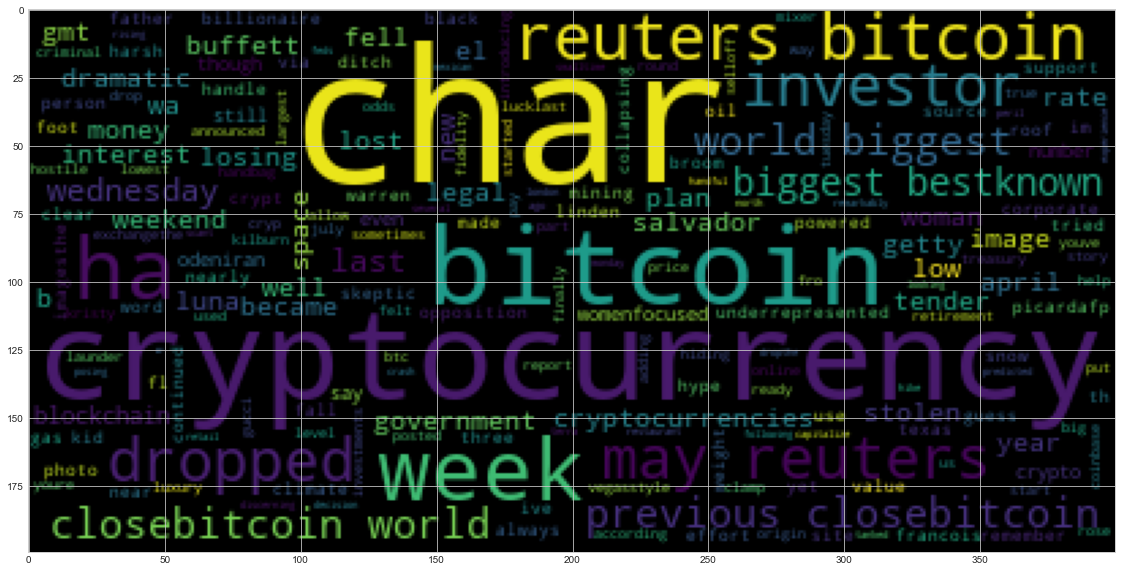

In [68]:
# Generate the Bitcoin word cloud
bitcoin_string = " ".join(all_bitcoin_tokens)
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

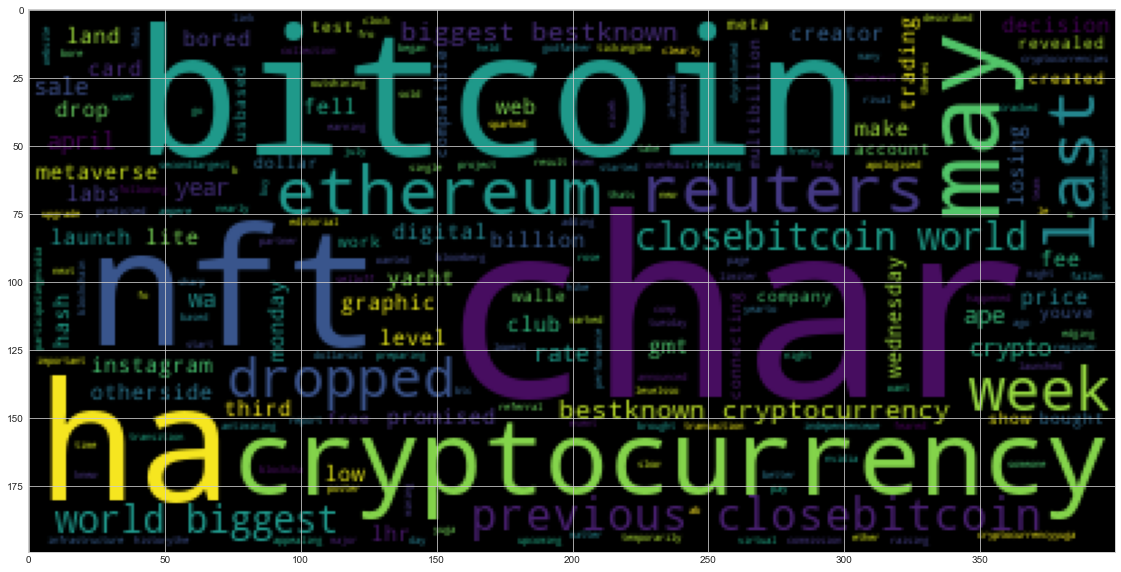

In [69]:
# Generate the Ethereum word cloud

eth_string = " ".join(all_eth_tokens)
wc_eth = WordCloud().generate(eth_string)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [70]:
import spacy
from spacy import displacy

In [71]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [72]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [76]:
# Concatenate all of the Bitcoin text together
bitcoin_concat_string = ""
for text in bitcoin_df['text']:
    bitcoin_concat_string = bitcoin_concat_string + text
    
print(bitcoin_concat_string)

Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images

 

 Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars]Image source, Getty Images
The value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to the Coinba

In [79]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_concat_string)

# Add a title to the document
# YOUR CODE HERE!

In [80]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [83]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images', 'Buffett', 'the weekend', 'nearly three feet', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'Last week', 'Fidelity Investments', 'the US Treasury', 'Bitcoin', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', '+361 chars]May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'last July', '33,000', 'the week', 'last week', 'Fed', '9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'Mexican', 'North London', 'a few weeks ago', '+2779 chars]May', '10', 'Reuters', 'chars]The Central African Republic', 'second', 'El Salvador', 'Wednesday', 'Faustin Archange', 'Touadera', 'two', "Seth Green's", 'Nike', 'Bankman-Fried', 'the digital asset exchange', 'FTX', 'first', 'September', '$3

---

### Ethereum NER

In [84]:
# Concatenate all of the Ethereum text together
eth_concat_string = ""
for text in ethereum_df['text']:
    eth_concat_string = eth_concat_string + text
    
print(eth_concat_string)

Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.
Yuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock's ticking.
The No.2 … [+4092 chars]Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.
The transition would overhaul the 

In [85]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat_string)

# Add a title to the document
# YOUR CODE HERE!

In [86]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [87]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Meta', 'Instagram', 'US', 'Instagram', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', 'chars]April 26', 'Reuters', 'No.2', 'second', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'IndependenceWe', 'chars]40 days ago', '47,454', '34,007', '28%.About a third', 'this week', 'Nvidia', 'Ampere Lite Hash Rate', 'LHR', 'Ethereum', '4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', '+339 chars]May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', '+361 chars]May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'NFT', 'Ethereum', 'Last week', '8', 'Nvidia', 'LHR', 'last year\xa0', 'last July', '33,000', 'the week', 'last week', 'Fed', 'the past few years', 'NFT', '$29 billion', '16%', 'Monday', '14.60', 'Getty Images\r\n', 'the weekend', '34,000', '27,630', 'Coinbase', 'YouTuber', 'fi

---